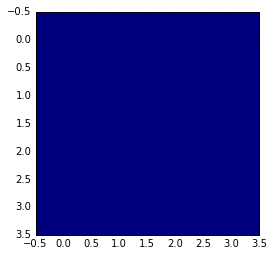

In [133]:
%matplotlib inline

import importlib

import matplotlib.pyplot as plt
import numpy as np

import metropolis_ising
importlib.reload(metropolis_ising)

ising = metropolis_ising.MetropolisIsing(lattice_size_L = 4, 
                                                   bond_energy_J = 1, 
                                                   temperature_T = 3,
                                                   initial_temperature = "lo", 
                                                   sweeps = 10000)
plt.imshow(ising.lattice, interpolation="nearest")
plt.show()

In [134]:
ising.metropolis()
magnet_history = ising.magnet_history
energy_history = ising.energy_history

Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


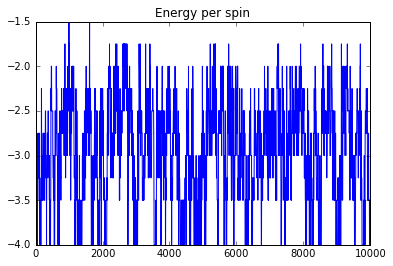

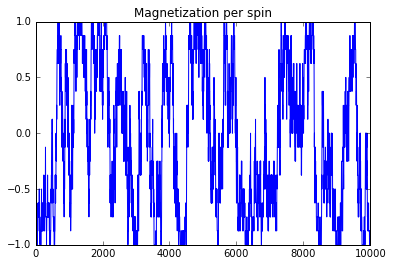

In [135]:
plt.title("Energy per spin")
cutoff = 25000
plt.plot(np.linspace(0, len(energy_history[:cutoff]), len(energy_history[:cutoff])), energy_history[:cutoff] / ising.no_of_sites)
plt.show()

plt.title("Magnetization per spin")
cutoff = 25000
plt.plot(np.linspace(0, len(magnet_history[:cutoff]), len(magnet_history[:cutoff])), magnet_history[:cutoff] / ising.no_of_sites)
plt.show()

In [ ]:
equilibrium = 2000
equilibrium_energy = energy_history[equilibrium:] 
equilibrium_magnet = magnet_history[equilibrium:]

In [182]:
def binning_method(data, L):
    binned_data = []
    if len(data) % 2 == 0:
        upper_bound = len(data)
    else:
        upper_bound = len(data) - 1
    for n in range(0, upper_bound, 2):
        binned_data.append(0.5 * (data[n] + data[n+1]))

#     if len(binned_data) > 2**L:
#          binned_data = binning_method(binned_data, min_no_bins)[1]

    std_dev = np.std(binned_data)/ising.no_of_sites
    return std_dev, binned_data

for k in range(1, 10, 1):
    print(binning_method(equilibrium_magnet, k)[0])


0.634519183122
0.634519183122
0.634519183122
0.634519183122
0.634519183122
0.634519183122
0.634519183122
0.634519183122
0.634519183122


In [161]:
def auto_correlation(t, data):
    print(t)
    tmax = len(data)
    time_delta = data[1] - data[0]
    print(type(data))
    
    upper_bound = tmax-t
    print(upper_bound)
    print(type(upper_bound))
    first_sum = 0
    second_sum = 0
    third_sum = 0
    for n in np.arange(upper_bound):
        first_sum += data[n]*data[n+t]
        second_sum += data[n]
        third_sum += data[n+t]
    
    correlation = (1/upper_bound)*(first_sum - (1/upper_bound)*second_sum*third_sum)

    return correlation

print(type(magnet_history))


<class 'numpy.ndarray'>


In [162]:
equilibrium = 2000
data = auto_correlation(np.linspace(0, 8000-equilibrium, 2), magnet_history[equilibrium:])
normalize = data / data.max()
plt.plot(range(250), normalize[:250])
plt.show()
correlation_time = np.trapz(normalize[:500])
print(correlation_time)

plt.plot(range(250), normalize[:250])
plt.yscale("log")
plt.show()

[    0.  6000.]
<class 'numpy.ndarray'>
[ 8000.  2000.]
<class 'numpy.ndarray'>


TypeError: only length-1 arrays can be converted to Python scalars

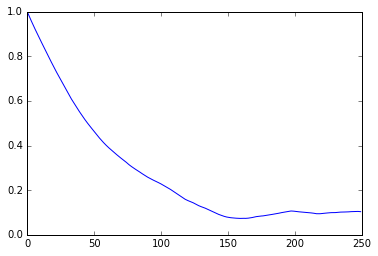

68.1120855045


In [43]:
plt.plot(range(250), normalize[:250])
plt.show()
correlation_time = np.trapz(normalize[:250])
print(correlation_time)

39999


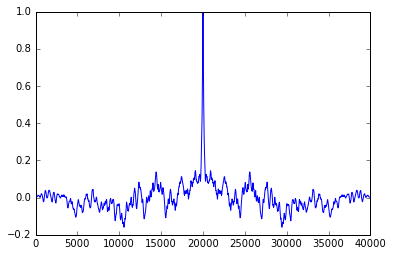

In [38]:
def numpy_autocor(data):
    data = np.asarray([d - np.mean(data) for d in data])
    acf = np.correlate(data, data, mode="full")
    return acf/acf.max()

acfunc = numpy_autocor(magnet_history)

print(len(acfunc))

plt.plot(range(len(acfunc)), acfunc)
# print(acfunc)

# plt.plot(np.linspace(0, 200, 200), acfunc[3999:4199])
# plt.show()


# plt.plot(np.linspace(0, 200, 200), acfunc[3999:4199])
# plt.yscale("log")
# plt.show()
 
# np.trapz(acfunc[999:1199])

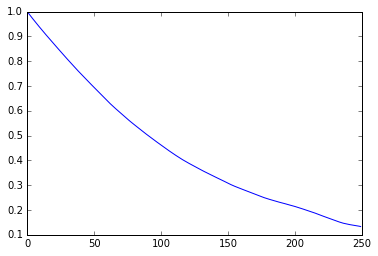

110.64764809869146

In [44]:
plt.plot(range(250), acfunc[19999:20249])
plt.show()
np.trapz(acfunc[19999:20249])

In [ ]:
magnet_samples = []
energy_samples = []


for t in range(equilibrium, 1000, math.ceil(2.5)):
    magnet_samples.append(magnet_history[t])
    energy_samples.append(energy_history[t])
    

    
print("absolute magnetization per spin", np.mean([math.fabs(m)/16 for m in magnet_samples]), np.std([math.fabs(m)/16 for m in magnet_samples]))
print("magnetization per spin", np.mean(magnet_samples)/16, np.std(magnet_samples)/16)
print("energy per spin", np.mean(energy_samples)/16, np.std(energy_samples)/16)
print("magnetization squared", np.mean([x**2 for x in magnet_samples]), np.std([x**2 for x in magnet_samples]))
    
    
    

TEMPERATURE 0.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


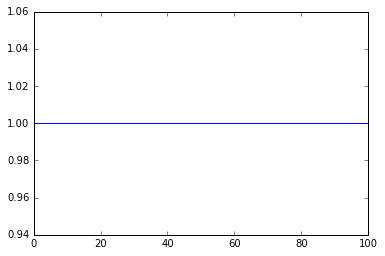

/Users/Teun/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/Users/Teun/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/Teun/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Teun/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/Teun/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Teun/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_s

19999
[ nan  nan  nan ...,  nan  nan  nan]
No valid auto correlation function.
correlation_time 4
TEMPERATURE 0.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


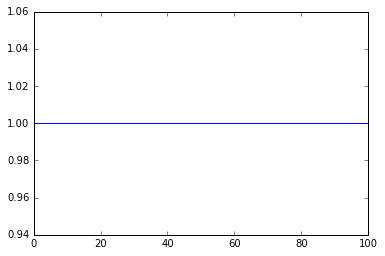

19999
[ nan  nan  nan ...,  nan  nan  nan]
No valid auto correlation function.
correlation_time 4
TEMPERATURE 0.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


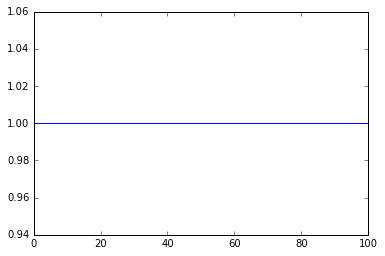

19999
[ nan  nan  nan ...,  nan  nan  nan]
No valid auto correlation function.
correlation_time 4
TEMPERATURE 0.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


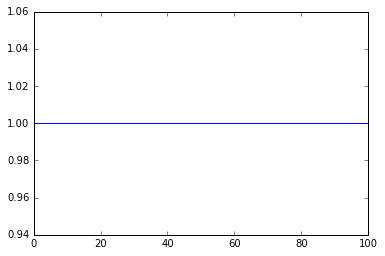

19999
[  1.10121133e-07   2.20242266e-07   3.30363400e-07 ...,   3.30363400e-07
   2.20242266e-07   1.10121133e-07]
correlation_time -0.0550606216839
Had to change correlation time.
TEMPERATURE 1.0
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


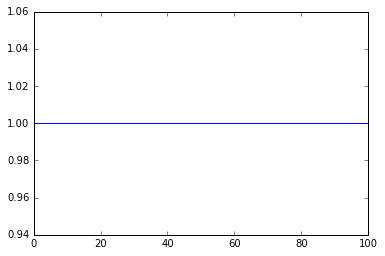

19999
[  2.00400802e-07   4.00801603e-07   6.01202405e-07 ...,   6.01202405e-07
   4.00801603e-07   2.00400802e-07]
correlation_time 0.212975851703
TEMPERATURE 1.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


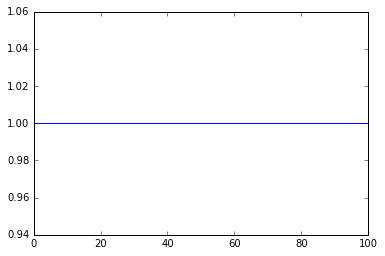

19999
[  2.21362648e-06   4.42725296e-06   6.64087944e-06 ...,   6.64087944e-06
   4.42725296e-06   2.21362648e-06]
correlation_time -0.351967717028
Had to change correlation time.
TEMPERATURE 1.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


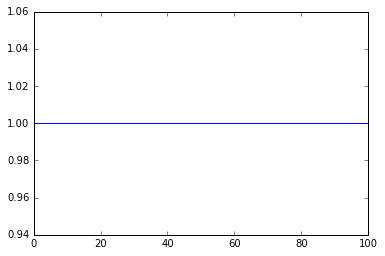

19999
[  6.49560161e-06   1.29912032e-05   1.94868048e-05 ...,   1.94868048e-05
   1.29912032e-05   6.49560161e-06]
correlation_time -0.420027633331
Had to change correlation time.
TEMPERATURE 1.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


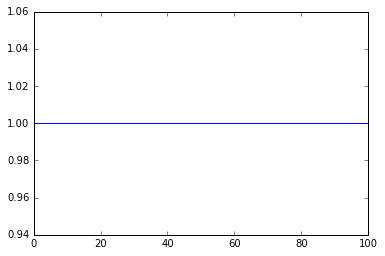

19999
[  8.00458366e-06   1.60091673e-05   2.40137510e-05 ...,   2.40137510e-05
   1.60091673e-05   8.00458366e-06]
correlation_time -0.438123412278
Had to change correlation time.
TEMPERATURE 1.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


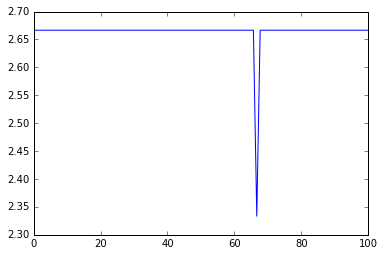

19999
[  2.12796528e-05   4.25593055e-05   6.38389583e-05 ...,   6.38389583e-05
   4.25593055e-05   2.12796528e-05]
correlation_time 1.88169718534
TEMPERATURE 2.0
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


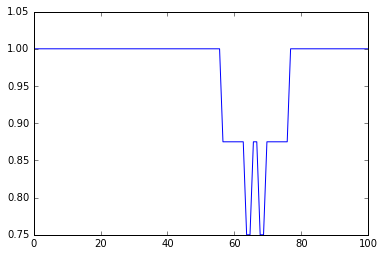

19999
[  1.98771175e-05   3.97542350e-05   5.96313525e-05 ...,   5.96313525e-05
   3.97542350e-05   1.98771175e-05]
correlation_time -10.9433779094
Had to change correlation time.
TEMPERATURE 2.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


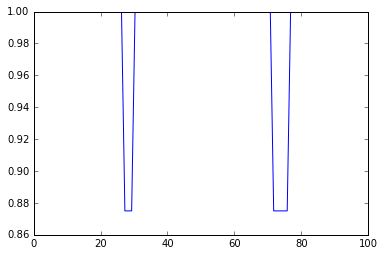

19999
[  2.53179656e-05   5.06359313e-05   7.59538969e-05 ...,   7.59538969e-05
   5.06359313e-05   2.53179656e-05]
correlation_time -0.159450149461
Had to change correlation time.
TEMPERATURE 2.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


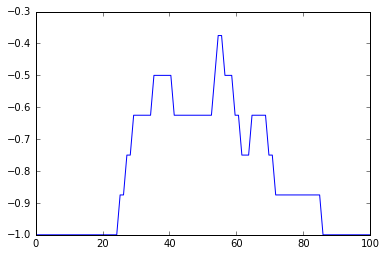

19999
[-0.00014105 -0.00026693 -0.00040798 ..., -0.00040798 -0.00026693
 -0.00014105]
correlation_time 11.2252148062
TEMPERATURE 2.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


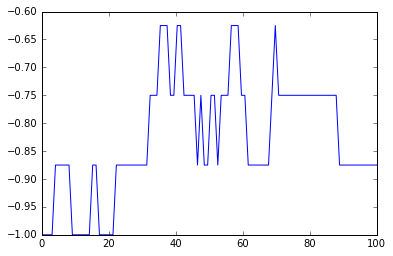

19999
[-0.0001614  -0.00032279 -0.00048419 ..., -0.00048419 -0.00032279
 -0.0001614 ]
correlation_time 9.77370144625
TEMPERATURE 2.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


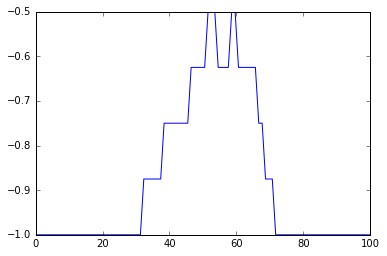

19999
[-0.0001032  -0.00020641 -0.00033127 ..., -0.00033127 -0.00020641
 -0.0001032 ]
correlation_time -9.36108803044
Had to change correlation time.
TEMPERATURE 3.0
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


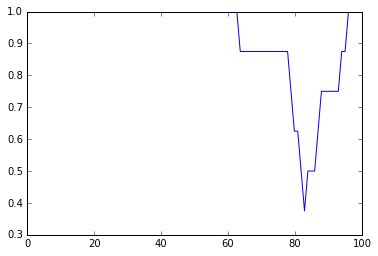

19999
[-0.00010695 -0.0002139  -0.00029199 ..., -0.00029199 -0.0002139
 -0.00010695]
correlation_time -17.3002063891
Had to change correlation time.
TEMPERATURE 3.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


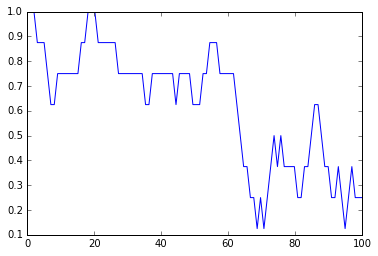

19999
[-0.00016766 -0.00036386 -0.00058859 ..., -0.00058859 -0.00036386
 -0.00016766]
correlation_time 4.10652674277
TEMPERATURE 3.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


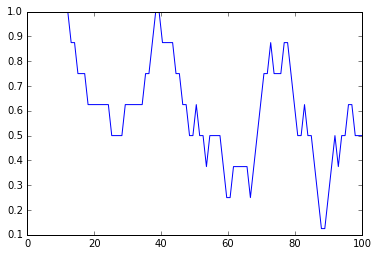

19999
[ 0.00023766  0.00047532  0.00071297 ...,  0.00071297  0.00047532
  0.00023766]
correlation_time -1.0348800657
Had to change correlation time.
TEMPERATURE 3.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


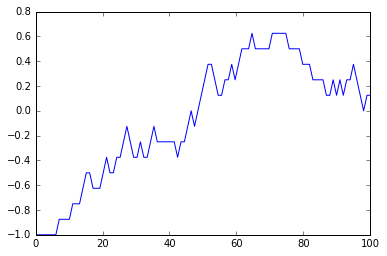

19999
[ 0.00010374  0.00020749  0.00027243 ...,  0.00027243  0.00020749
  0.00010374]
correlation_time 12.5764701957
TEMPERATURE 3.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


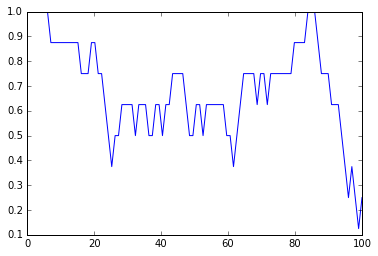

19999
[ -9.09598937e-05  -1.36165314e-04  -1.35616260e-04 ...,  -1.35616260e-04
  -1.36165314e-04  -9.09598937e-05]
correlation_time -36.4267435245
Had to change correlation time.
TEMPERATURE 4.0
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


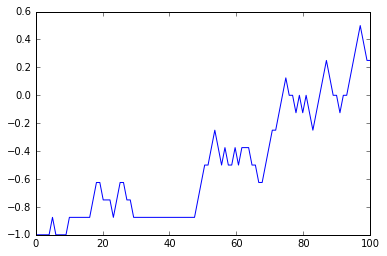

19999
[ 0.00014577  0.00029153  0.0004373  ...,  0.0004373   0.00029153
  0.00014577]
correlation_time 0.767252797428
TEMPERATURE 4.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


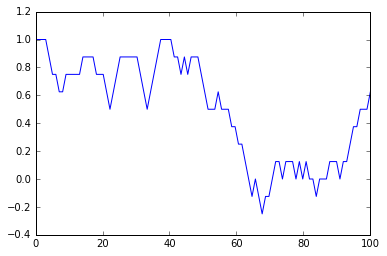

19999
[  8.98067955e-05   2.36349200e-04   3.82891604e-04 ...,   3.82891604e-04
   2.36349200e-04   8.98067955e-05]
correlation_time -0.77610353235
Had to change correlation time.
TEMPERATURE 4.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


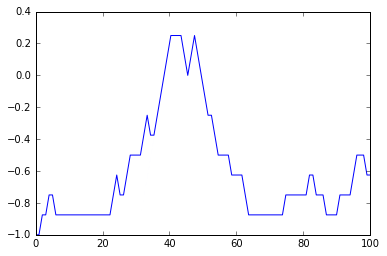

19999
[-0.00023452 -0.00041041 -0.00055699 ..., -0.00055699 -0.00041041
 -0.00023452]
correlation_time -2.77667075218
Had to change correlation time.
TEMPERATURE 4.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


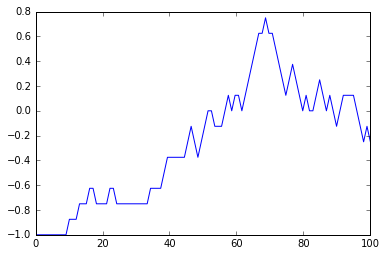

19999
[ -7.12862078e-07  -1.42572416e-06  -2.13858623e-06 ...,  -2.13858623e-06
  -1.42572416e-06  -7.12862078e-07]
correlation_time 2.77238652198
TEMPERATURE 4.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


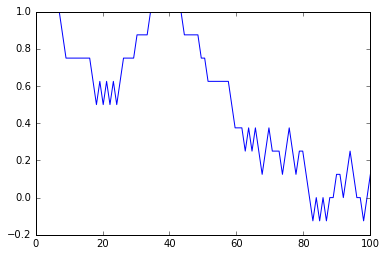

19999
[ -5.44693210e-05  -1.08938642e-04  -9.25305121e-05 ...,  -9.25305121e-05
  -1.08938642e-04  -5.44693210e-05]
correlation_time -3.93135022746
Had to change correlation time.
TEMPERATURE 5.0
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


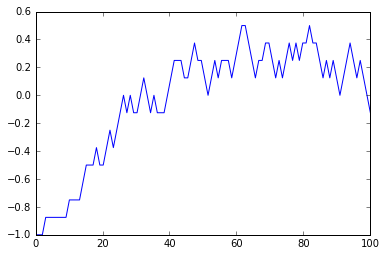

19999
[  5.64936567e-05   4.37209369e-05   1.00214594e-04 ...,   1.00214594e-04
   4.37209369e-05   5.64936567e-05]
correlation_time 1.26795493913
TEMPERATURE 5.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


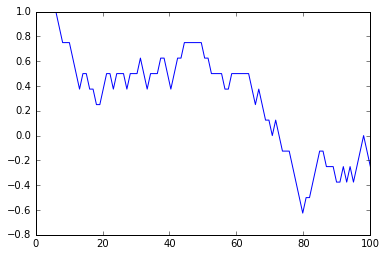

19999
[-0.00015702 -0.00031403 -0.00047105 ..., -0.00047105 -0.00031403
 -0.00015702]
correlation_time -1.64624452872
Had to change correlation time.
TEMPERATURE 5.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


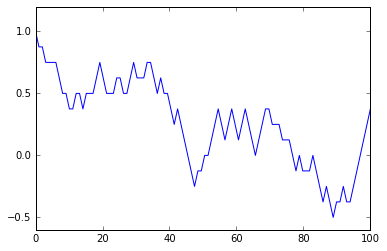

19999
[  6.96815910e-05   5.34830579e-05   4.70343233e-05 ...,   4.70343233e-05
   5.34830579e-05   6.96815910e-05]
correlation_time -0.78897931647
Had to change correlation time.
TEMPERATURE 5.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


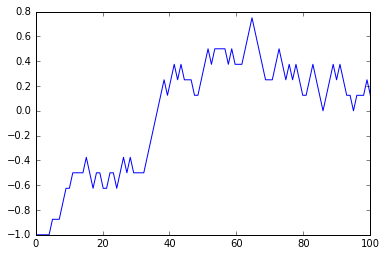

19999
[ 0.0002038   0.0004076   0.00052649 ...,  0.00052649  0.0004076   0.0002038 ]
correlation_time 0.790459549766
TEMPERATURE 5.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


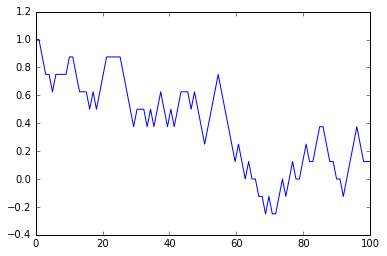

19999
[ 0.00023558  0.00039057  0.00043523 ...,  0.00043523  0.00039057
  0.00023558]
correlation_time 1.77923587319
TEMPERATURE 6.0
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


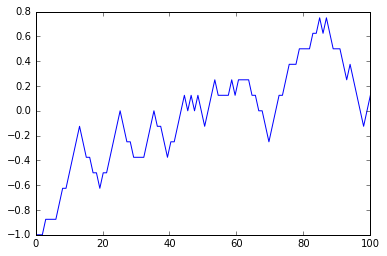

19999
[ 0.00010145  0.00029311  0.00039456 ...,  0.00039456  0.00029311
  0.00010145]
correlation_time 2.44628824414
TEMPERATURE 6.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


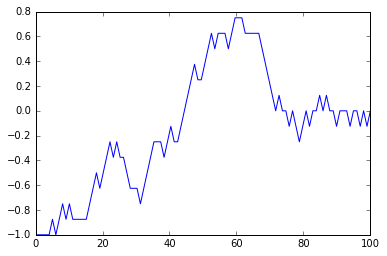

19999
[  1.19920760e-04   1.38522865e-04   5.58063151e-05 ...,   5.58063151e-05
   1.38522865e-04   1.19920760e-04]
correlation_time -0.726765100997
Had to change correlation time.
TEMPERATURE 6.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


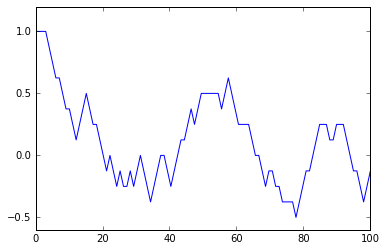

19999
[-0.00019177 -0.00038353 -0.00048279 ..., -0.00048279 -0.00038353
 -0.00019177]
correlation_time 1.52633795817
TEMPERATURE 6.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


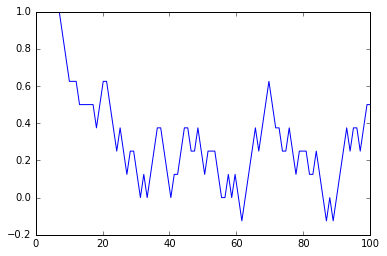

19999
[ -1.18032131e-05  -1.12957018e-04  -2.14110823e-04 ...,  -2.14110823e-04
  -1.12957018e-04  -1.18032131e-05]
correlation_time -0.241663887572
Had to change correlation time.
TEMPERATURE 6.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


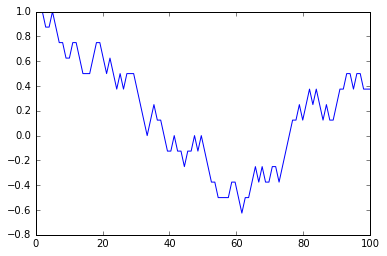

19999
[-0.00055454 -0.00101913 -0.00139378 ..., -0.00139378 -0.00101913
 -0.00055454]
correlation_time 0.976186135774
TEMPERATURE 7.0
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


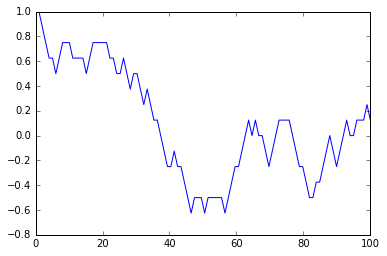

19999
[-0.00030719 -0.00071693 -0.00098574 ..., -0.00098574 -0.00071693
 -0.00030719]
correlation_time -1.20886567235
Had to change correlation time.
TEMPERATURE 7.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


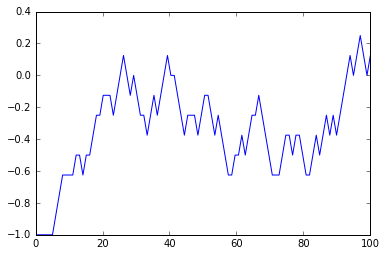

19999
[ 0.00019297  0.00027659  0.00025084 ...,  0.00025084  0.00027659
  0.00019297]
correlation_time -4.86115249055
Had to change correlation time.
TEMPERATURE 7.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


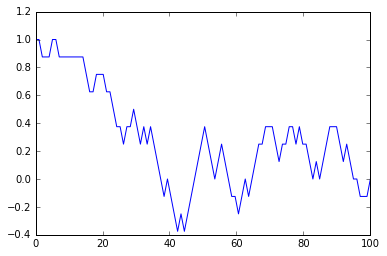

19999
[ 0.00067648  0.00135296  0.0019462  ...,  0.0019462   0.00135296
  0.00067648]
correlation_time 1.19304420482
TEMPERATURE 7.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


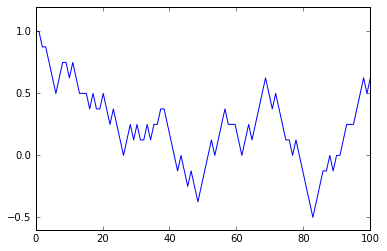

19999
[-0.00031968 -0.00052989 -0.00081001 ..., -0.00081001 -0.00052989
 -0.00031968]
correlation_time -4.88901847742
Had to change correlation time.
TEMPERATURE 7.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


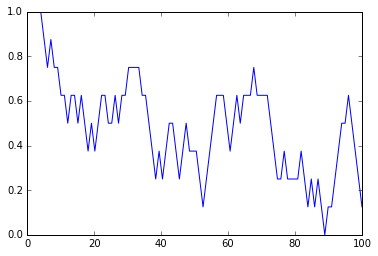

19999
[ 0.00055     0.00110001  0.00153808 ...,  0.00153808  0.00110001  0.00055   ]
correlation_time 5.37060314942
TEMPERATURE 8.0
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


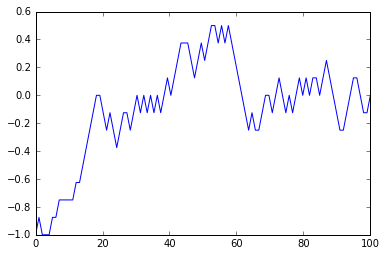

19999
[ 0.00043439  0.00081391  0.0012483  ...,  0.0012483   0.00081391
  0.00043439]
correlation_time 1.35575514339
TEMPERATURE 8.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


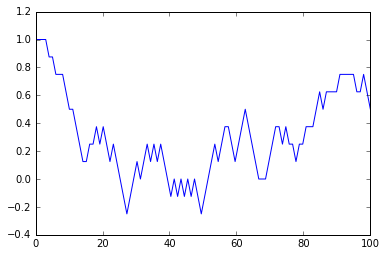

19999
[ 0.00036602  0.00061754  0.00086906 ...,  0.00086906  0.00061754
  0.00036602]
correlation_time 2.37557194232
TEMPERATURE 8.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


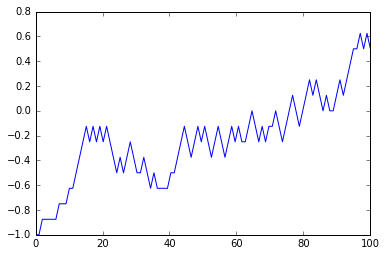

19999
[-0.0002164  -0.00031545 -0.00050532 ..., -0.00050532 -0.00031545
 -0.0002164 ]
correlation_time 0.833414626084
TEMPERATURE 8.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


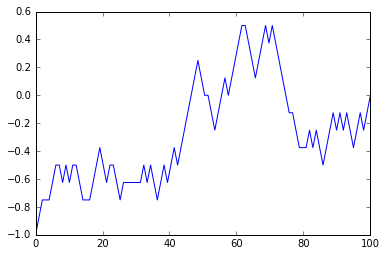

19999
[ 0.00022015  0.00029574  0.00047486 ...,  0.00047486  0.00029574
  0.00022015]
correlation_time 5.62879342034
TEMPERATURE 8.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


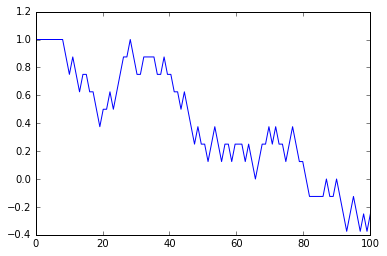

19999
[ -1.31393563e-04  -1.57974137e-04  -7.97417221e-05 ...,  -7.97417221e-05
  -1.57974137e-04  -1.31393563e-04]
correlation_time -0.0268284470137
Had to change correlation time.
TEMPERATURE 9.0
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


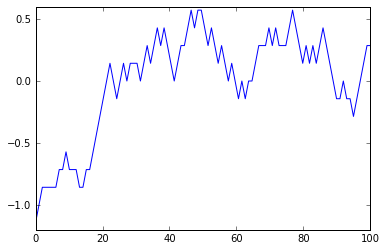

19999
[ 0.00011547  0.00034364  0.0004138  ...,  0.0004138   0.00034364
  0.00011547]
correlation_time 0.5524444916
TEMPERATURE 9.2
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


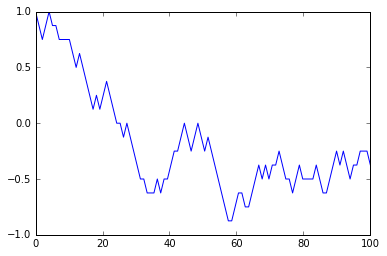

19999
[ -1.88864671e-05   9.18997934e-05   6.16150935e-05 ...,   6.16150935e-05
   9.18997934e-05  -1.88864671e-05]
correlation_time -0.0772583434491
Had to change correlation time.
TEMPERATURE 9.4
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


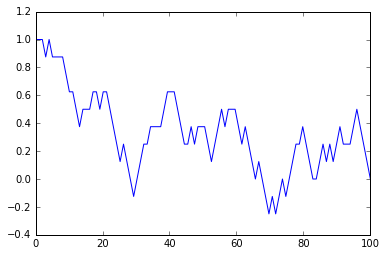

19999
[ 0.00024313  0.00060807  0.00085121 ...,  0.00085121  0.00060807
  0.00024313]
correlation_time -2.20776420337
Had to change correlation time.
TEMPERATURE 9.6
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


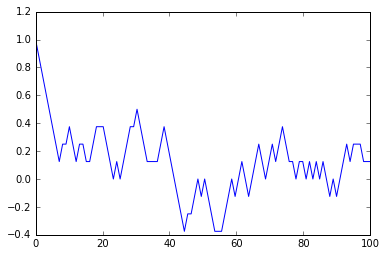

19999
[ -3.72250505e-06  -1.37592246e-04  -1.23995649e-04 ...,  -1.23995649e-04
  -1.37592246e-04  -3.72250505e-06]
correlation_time -1.11858849901
Had to change correlation time.
TEMPERATURE 9.8
Sweep 0
Sweep 1000
Sweep 2000
Sweep 3000
Sweep 4000
Sweep 5000
Sweep 6000
Sweep 7000
Sweep 8000
Sweep 9000


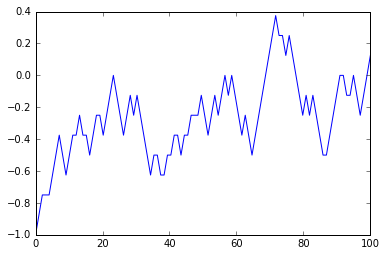

19999
[-0.00060317 -0.00125222 -0.00181096 ..., -0.00181096 -0.00125222
 -0.00060317]
correlation_time 0.412537844213


In [147]:
temp_dep_energy = []
temp_dep_energy_error = []
temp_dep_magnet = []
temp_dep_magnet_error = []

lattice_L = 4
import math

for T in np.arange(0.2, 10.0, 0.2):
    print("TEMPERATURE", T)
    magnet_samples = []
    energy_samples = []
    ising = metropolis_ising.MetropolisIsing(lattice_size_L = 4, 
                                                   bond_energy_J = 1, 
                                                   temperature_T = T,
                                                   initial_temperature = "lo", 
                                                   sweeps = 10000)
    ising.metropolis()
    energy_history = ising.energy_history
    magnet_history = ising.magnet_history
    plt.plot(np.linspace(0,100, 100), [m/max(magnet_history) for m in magnet_history[:100]])
    plt.show()
    acf = numpy_autocor(magnet_history)
    
    print(len(acf))
    print(acf)
    if np.isnan(acf).any():
        print("No valid auto correlation function.")
        correlation_time = 4
    else:
        correlation_time = np.trapz(acf[999:])
        
    
    print("correlation_time", correlation_time)
    if correlation_time <= 0:
        correlation_time = 4
        print("Had to change correlation time.")
    for t in range(equilibrium, 1000, math.ceil(correlation_time)):
        magnet_samples.append(magnet_history[t])
        energy_samples.append(energy_history[t])

    temp_dep_energy.append(np.mean(energy_samples))
    temp_dep_energy_error.append(np.std(energy_samples))
    
    temp_dep_magnet.append(np.mean(np.absolute(magnet_samples)/ising.no_of_sites))
    temp_dep_magnet_error.append(np.std(np.absolute(magnet_samples)/ising.no_of_sites))
    
    
    

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


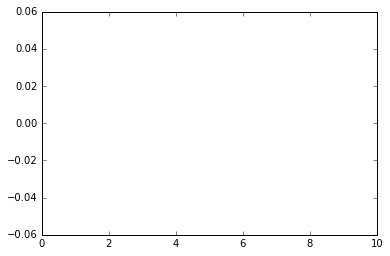

In [150]:
# plt.plot(np.arange(0.2, 5.0, 0.2), temp_dep_energy)
print(temp_dep_energy)
plt.xlim(0, 10)
plt.scatter(np.arange(0.2, 10.0, 0.2), temp_dep_energy)
plt.errorbar(np.arange(0.2, 10.0, 0.2), temp_dep_energy, temp_dep_energy_error, linestyle='None')
plt.show()

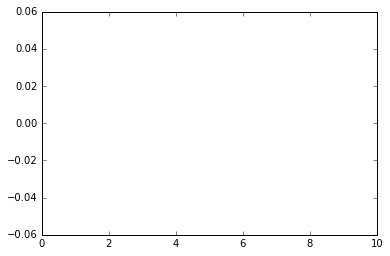

In [149]:
# plt.plot(np.arange(0.2, 5.0, 0.2), temp_dep_magnet)
plt.xlim(0, 10)
plt.scatter(np.arange(0.2, 10.0, 0.2), temp_dep_magnet)
plt.errorbar(np.arange(0.2, 10.0, 0.2),  temp_dep_magnet, temp_dep_magnet_error, linestyle='None')
plt.show()

/Users/Teun/Dropbox/University/bachelor-project/code/metropolis_ising.py:114: RuntimeWarning: invalid value encountered in double_scalars
  # Flip the spin and change the energy.


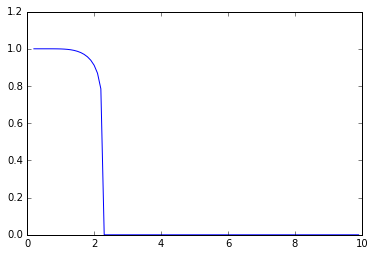

In [51]:
# def magnetizability(T):
#     M = (1 - np.sinh(2*(1/T)*1)**(-4))**(1/8)
#     if math.isnan(M):
#         return 0
    
#     return M


exact_magnet = [ising.exact_magnetization(T) for T in np.arange(0.2, 10, 0.1)]

plt.xlim(0, 10)
plt.ylim(0, 1.2)

# plt.scatter(np.arange(0.2, 10.0, 0.2), temp_dep_magnet)
# plt.errorbar(np.arange(0.2, 10.0, 0.2),  temp_dep_magnet, temp_dep_magnet_error, linestyle='None')
plt.plot(np.arange(0.2, 10, 0.1), exact_magnet)
plt.show()

In [ ]:
import scipy.special
def energy(T):
    J = -1
    k = 2 * np.sinh(2*(1/T)*-J)/(np.cosh(2*(1/T)*J))**2
    energy = J * (1/np.tanh(2*(1/T)*J)) * (1 + (2*np.tanh(2*(1/T)*J) - 1)* (2/np.pi) * scipy.special.ellipk(k))
    return energy

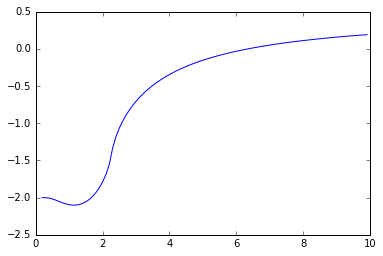

In [54]:
exact_energy = [ising.exact_energy(T) for T in np.arange(0.2, 10, 0.1)]
plt.plot(np.arange(0.2, 10, 0.1), exact_energy)

# plt.xlim(0, 10)
# plt.scatter(np.arange(0.2, 10.0, 0.2), temp_dep_energy)
# plt.errorbar(np.arange(0.2, 10.0, 0.2), temp_dep_energy, temp_dep_energy_error, linestyle='None')
plt.show()